# Polarizability Benchmark: GFN2 Evaluation

1. Creates linear regression plots of cc-pVTZ vs GFN2 isotropic polarizability values

    Generates 2 (1x3) Multiplots:  
    - Standard Linear Regression
    - Huber Linear Regression w y-int=0
    

2. Calculates Mean Absolute Error for cc-pVTZ vs GFN2 isotropic polarizability values

Note: produces identical figures at 300 dpi in pdf and png format, commented out to prevent accidental overwrite

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error

### Data Processing

In [2]:
master_file = '../data/polar_benchmark_master.csv'
master_df = pd.read_csv(master_file)
master_df.tail()

,ID,subset,GFN2,wB97X/cc-pVDZ,wB97X/cc-pVTZ,wB97X/jun-cc-pVTZ,wB97X/aug-cc-pVTZ
68,1175_67_010101,ga_hexamers,246.577641,399.132205,420.328366,-1.0,-1.0
69,410_658_001000,ga_hexamers,256.029135,371.953863,392.290343,-1.0,-1.0
70,867_397_111011,ga_hexamers,259.184933,409.379205,432.635864,-1.0,-1.0
71,379_282_000100,ga_hexamers,260.776229,441.802262,464.997122,-1.0,-1.0
72,379_525_001000,ga_hexamers,276.044063,430.469069,415.776671,-1.0,-1.0


### Method Definition

In [3]:
'''
    Calculates root mean square error

    Parameters
    ---------
    predictions: ndarray of floats
        expected values [based on best fit line]
    observations: ndarray of floats
        observed values
    
    Returns
    -------
    rmse: float
        root mean square error
'''
def calc_rmse(predictions, observations):
    rmse = np.sqrt(((predictions - observations) ** 2).mean())
    return rmse

In [4]:
'''
    Performs linear regression on data set and calculates associated values

    Parameters
    ---------
    x: ndarray of floats
        x values
    y: ndarray of floats
        y values
    intercept: boolean
        if true, calculates y intercept, if false sets y intercept to 0 (forces fit)
    
    Returns
    -------
    lin_regress_var: list of floats
        slope, y-intercept, r^2, root mean square error
'''

def perform_lin_regress(x, y, intercept=True):  
     
    # 2D X array necessary for sklearn
    xi = x.reshape((-1,1))

    model = LinearRegression(fit_intercept = intercept)
    model.fit(xi,y)
    
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(xi,y)

    # calculate RMSE
    y_pred = y
    y_true = []
    for val in x: 
        y_tr = slope*val + intercept
        y_true.append(y_tr)
    y_true = np.array(y_true)

    rmse = calc_rmse(y_pred, y_true)
    
    lin_regress_var = [slope, intercept, r_squared, rmse]
    
    return lin_regress_var

In [5]:
'''
    Performs Huber linear regression on data set and calculates associated values [ROBUST TO OUTLIERS]

    Parameters
    ---------
    x: ndarray of floats
        x values
    y: ndarray of floats
        y values
    intercept: boolean
        if true, calculates y intercept, if false sets y intercept to 0 (forces fit)
    
    Returns
    -------
    lin_regress_var: list of floats
        slope, y-intercept, r^2, root mean square error
'''
def perform_huber_regress(x, y, intercept=True):
    
    # 2D X array necessary for sklearn
    xi = x.reshape((-1,1))
    
    model = HuberRegressor(fit_intercept=intercept)
    model.fit(xi, y)
    
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(xi, y)
    
    # calculate RMSE
    y_pred = y
    y_true = []
    for val in x: 
        y_tr = slope*val + intercept
        y_true.append(y_tr)
    y_true = np.array(y_true)

    rmse = calc_rmse(y_pred, y_true)
    
    huber_regress_var = [slope, intercept, r_squared, rmse]
    
    return huber_regress_var

In [6]:
# matplotlib global formatting

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

plt.rcParams['figure.dpi'] = 300

# Multiplot (Standard Linear Regressor)

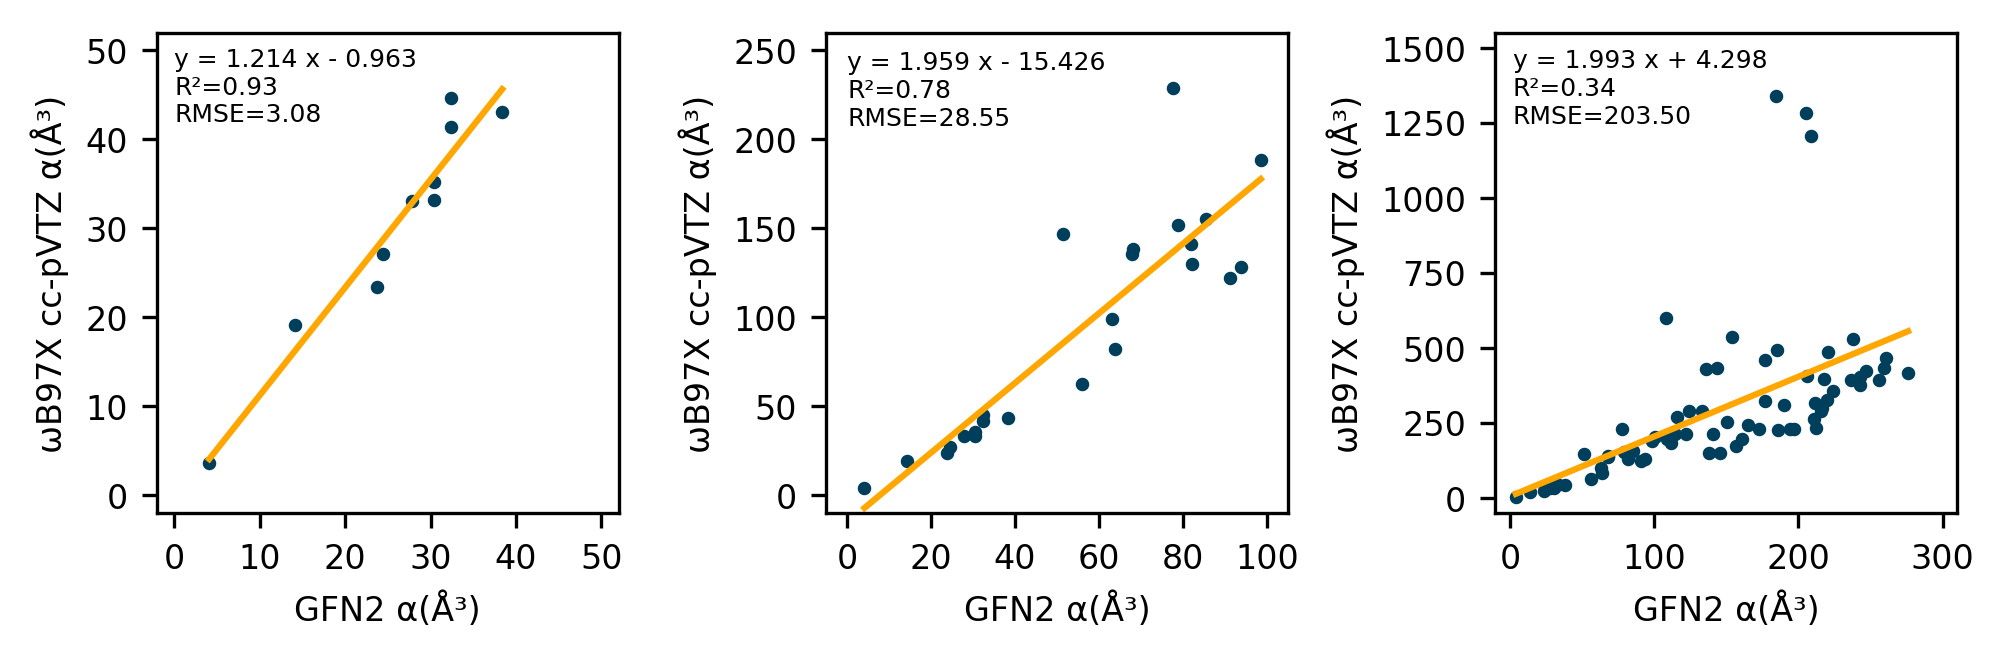

In [7]:
# set up subplot figure
fig, axs = plt.subplots(1, 3)
top = 0.4
bottom = 0
left = 0
right = 1
plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, wspace=0.45)


# SUBPLOT 0: 0-50 Å³
# slice out data
zero_df = master_df[master_df['GFN2'] <= 50]

x=zero_df['GFN2'].values
y=zero_df['wB97X/cc-pVTZ'].values

axs[0].set(ylim=(-2,52), xlim=(-2,52))
axs[0].set_xlabel('GFN2 α(Å³)')
axs[0].set_ylabel('ωB97X cc-pVTZ α(Å³)')
axs[0].set_xticks([0,10,20,30,40,50])
axs[0].set_yticks([0,10,20,30,40,50])

# perform linear regression
slope, intercept, r_squared, rmserror = perform_lin_regress(x, y, True)

# plot points & regression line
axs[0].scatter(x, y, s=5, c='#003f5c')
axs[0].plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
if intercept < 0:
    y_int = '- %.3f' % abs(intercept)
else: 
    y_int = '+ %.3f' % intercept
axs[0].text(0, 42, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))


# SUBPLOT 1: 0-100 Å³
# slice out data
one_df = master_df[master_df['GFN2'] <= 100]

x=one_df['GFN2'].values
y=one_df['wB97X/cc-pVTZ'].values

axs[1].set(ylim=(-10,260), xlim=(-5,105))
axs[1].set_xlabel('GFN2 α(Å³)')
axs[1].set_ylabel('ωB97X cc-pVTZ α(Å³)')
axs[1].set_xticks([0,20,40,60,80,100])
axs[1].set_yticks([0,50,100,150,200,250])

# perform linear regression
slope, intercept, r_squared, rmserror = perform_lin_regress(x, y, True)

# plot points & regression line
axs[1].scatter(x, y, s=5, c='#003f5c')
axs[1].plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
if intercept < 0:
    y_int = '- %.3f' % abs(intercept)
else: 
    y_int = '+ %.3f' % intercept
axs[1].text(0, 208, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))


# SUBPLOT 2: All Data
x=master_df['GFN2'].values
y=master_df['wB97X/cc-pVTZ'].values

axs[2].set(ylim=(-50,1550), xlim=(-10,310))
axs[2].set_xlabel('GFN2 α(Å³)')
axs[2].set_ylabel('ωB97X cc-pVTZ α(Å³)')
axs[2].set_xticks([0,100,200,300])
axs[2].set_yticks([0,250,500,750,1000,1250,1500])

# perform linear regression
slope, intercept, r_squared, rmserror = perform_lin_regress(x, y, True)

# plot points & regression line
axs[2].scatter(x, y, s=5, c='#003f5c')
axs[2].plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
if intercept < 0:
    y_int = '- %.3f' % abs(intercept)
else: 
    y_int = '+ %.3f' % intercept
axs[2].text(2, 1250, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))


# Adjust subplots since y-axes have different widths
# d=(right-left)
# l0=axs[0].get_position().get_points()[1][0]-axs[0].get_position().get_points()[0][0]
# l1=axs[1].get_position().get_points()[1][0]-axs[1].get_position().get_points()[0][0]
# l2=axs[2].get_position().get_points()[1][0]-axs[2].get_position().get_points()[0][0]

# spacer = (d-(l0+l1+l2))/2
# x1 = l0+spacer
# x2 = l0+l2+2*spacer

# axs[1].set_position([x1, bottom, l1, top])
# axs[2].set_position([x2, bottom, l2, top])

# plt.savefig('gfn2_huber_multiplot.pdf', transparent=False, bbox_inches='tight')
# plt.savefig('gfn2_huber_multiplot.png', transparent=False, bbox_inches='tight')

plt.show()

# Multiplot (Huber Regressor, 0 Intercept)

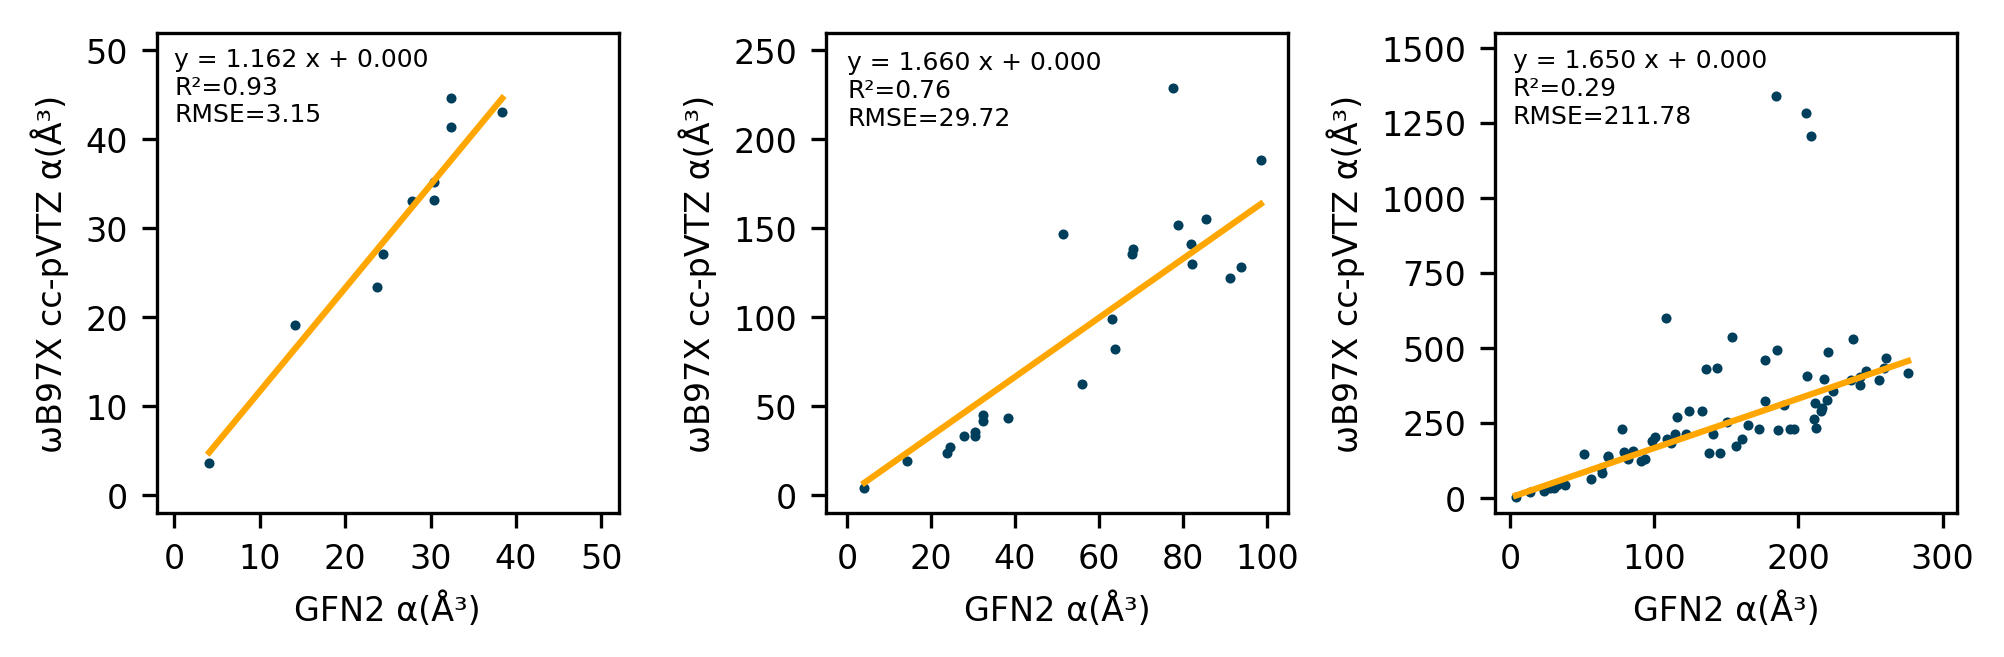

In [8]:
# set up subplot figure
fig, axs = plt.subplots(1, 3)
top = 0.4
bottom = 0
left = 0
right = 1
plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, wspace=0.45)


# SUBPLOT 0: 0-50 Å³
# slice out data
zero_df = master_df[master_df['GFN2'] <= 50]

x=zero_df['GFN2'].values
y=zero_df['wB97X/cc-pVTZ'].values

axs[0].set(ylim=(-2,52), xlim=(-2,52))
axs[0].set_xlabel('GFN2 α(Å³)')
axs[0].set_ylabel('ωB97X cc-pVTZ α(Å³)')
axs[0].set_xticks([0,10,20,30,40,50])
axs[0].set_yticks([0,10,20,30,40,50])

# perform linear regression
slope, intercept, r_squared, rmserror = perform_huber_regress(x, y, False)

# plot points & regression line
axs[0].scatter(x, y, s=2, c='#003f5c')
axs[0].plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
if intercept < 0:
    y_int = '- %.3f' % abs(intercept)
else: 
    y_int = '+ %.3f' % intercept
axs[0].text(0, 42, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))


# SUBPLOT 1: 0-100 Å³
# slice out data
one_df = master_df[master_df['GFN2'] <= 100]

x=one_df['GFN2'].values
y=one_df['wB97X/cc-pVTZ'].values

axs[1].set(ylim=(-10,260), xlim=(-5,105))
axs[1].set_xlabel('GFN2 α(Å³)')
axs[1].set_ylabel('ωB97X cc-pVTZ α(Å³)')
axs[1].set_xticks([0,20,40,60,80,100])
axs[1].set_yticks([0,50,100,150,200,250])

# perform linear regression
slope, intercept, r_squared, rmserror = perform_huber_regress(x, y, False)

# plot points & regression line
axs[1].scatter(x, y, s=2, c='#003f5c')
axs[1].plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
if intercept < 0:
    y_int = '- %.3f' % abs(intercept)
else: 
    y_int = '+ %.3f' % intercept
axs[1].text(0, 208, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))


# SUBPLOT 2: All Data
x=master_df['GFN2'].values
y=master_df['wB97X/cc-pVTZ'].values

axs[2].set(ylim=(-50,1550), xlim=(-10,310))
axs[2].set_xlabel('GFN2 α(Å³)')
axs[2].set_ylabel('ωB97X cc-pVTZ α(Å³)')
axs[2].set_xticks([0,100,200,300])
axs[2].set_yticks([0,250,500,750,1000,1250,1500])

# perform linear regression
slope, intercept, r_squared, rmserror = perform_huber_regress(x, y, False)

# plot points & regression line
axs[2].scatter(x, y, s=2, c='#003f5c')
axs[2].plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
if intercept < 0:
    y_int = '- %.3f' % abs(intercept)
else: 
    y_int = '+ %.3f' % intercept
axs[2].text(2, 1250, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))


# Adjust subplots since y-axes have different widths
# d=(right-left)
# l0=axs[0].get_position().get_points()[1][0]-axs[0].get_position().get_points()[0][0]
# l1=axs[1].get_position().get_points()[1][0]-axs[1].get_position().get_points()[0][0]
# l2=axs[2].get_position().get_points()[1][0]-axs[2].get_position().get_points()[0][0]

# spacer = (d-(l0+l1+l2))/2
# x1 = l0+spacer
# x2 = l0+l2+2*spacer

# axs[1].set_position([x1, bottom, l1, top])
# axs[2].set_position([x2, bottom, l2, top])

# plt.savefig('gfn2_huber_multiplot.pdf', transparent=False, bbox_inches='tight')
# plt.savefig('gfn2_huber_multiplot.png', transparent=False, bbox_inches='tight')

plt.show()

### Calculate Mean Absolute Error

In [9]:
# for 0-50 Å³ data
fifty_df = master_df[master_df['GFN2'] <= 50]
y_true_50 = fifty_df['wB97X/cc-pVTZ'].values
y_pred_50 = fifty_df['GFN2'].values

mae_50 = mean_absolute_error(y_true_50, y_pred_50)

mae_50

4.7198274728669976

In [10]:
# for 0-100 Å³ data
hundred_df = master_df[master_df['GFN2'] <= 100]
y_true_100 = hundred_df['wB97X/cc-pVTZ'].values
y_pred_100 = hundred_df['GFN2'].values

mae_100 = mean_absolute_error(y_true_100, y_pred_100)

mae_100

37.31107427533291

In [11]:
# for all data
y_true = master_df['wB97X/cc-pVTZ'].values
y_pred = master_df['GFN2'].values

mae = mean_absolute_error(y_true, y_pred)

mae

145.02266644288372